<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Take-notice!" data-toc-modified-id="Take-notice!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Take notice!</a></span></li><li><span><a href="#Geocoding-Template" data-toc-modified-id="Geocoding-Template-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Geocoding Template</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Data-exploration-and-cleanup" data-toc-modified-id="Data-exploration-and-cleanup-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data exploration and cleanup</a></span></li><li><span><a href="#Trim-the-data" data-toc-modified-id="Trim-the-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Trim the data</a></span></li><li><span><a href="#Add-the-lat/lon-columns" data-toc-modified-id="Add-the-lat/lon-columns-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Add the lat/lon columns</a></span></li><li><span><a href="#Let's-just-use-20-random-rows" data-toc-modified-id="Let's-just-use-20-random-rows-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Let's just use 20 random rows</a></span></li><li><span><a href="#Loop-and-geocode" data-toc-modified-id="Loop-and-geocode-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Loop and geocode</a></span></li><li><span><a href="#Convert-to-geodataframe" data-toc-modified-id="Convert-to-geodataframe-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Convert to geodataframe</a></span></li><li><span><a href="#Add-base-layer-capability" data-toc-modified-id="Add-base-layer-capability-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Add base layer capability</a></span></li><li><span><a href="#Map-it!" data-toc-modified-id="Map-it!-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Map it!</a></span></li></ul></li></ul></div>

<div class="alert alert-danger">

<h1>Take notice!</h1>
<ul>
    <li>Make sure you are working with a copy and not the original notebook file</li>
    <li>This class will be recorded</li>
</ul>
    
</div>

# Geocoding Template

*Special thanks to **Jayne** for providing the data and workflow for this template!*

<img src="images/geocode.png">

Your data may have addresses with no other geographic identifyers (such as FIPS codes or latitude/longitude coordinates). In such cases, it is necessary to **geocode** your table, and convert the addresses to geographic coordinates.

This template is designed to:
* take in a table that has a column with addresses
* clean the table so that only relevant columns are left
* loop through every row of the table and geocode them
* convert the geocoded table into a geodataframe
* map it!

## Import libraries

In [1]:
# to download osm dataimport osmnx as ox
import osmnx as ox

# to manipulate and visualize spatial dataimport geopandas as gpd
import geopandas as gpd

# to provide basemaps import contextily as ctx
import contextily as ctx

# to plot things with plotlyimport plotly.express as px
import plotly.express as px

# we import this so we can process this csv file
import pandas as pd

projects = pd.read_csv('LAProjects.csv')

## Data exploration and cleanup

In [2]:
projects.head()

,Application Number,Unnamed: 1,Type of tax credit funding,Project Name,Project Address,Project City,Project Zip Code,Project Phone Number,Project County,California Assembly District,...,Management Company Fax,Developer,Annual Federal Award,Total State Award,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,CA-2000-858,NaN,4%,Main Street Plaza,"333 West Main Street, Alhambra, CA 918017427",Alhambra,91801,626-289-5800,Los Angeles,49.0,...,310-432-0888,NaN,"$486,869",$0,NaN,NaN,NaN,NaN,NaN,NaN
1,CA-2005-863,NaN,4%,Wysong Village Apartments,"111 North Chapel Avenue, Alhambra, CA 918010000",Alhambra,91801,626-284-3956,Los Angeles,49.0,...,614-273-2154,National Church Residences,"$293,106",$0,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-1992-901,NaN,4%,Altadena Vistas Apartments,"815 E. Calaveras Street, Altadena, CA 91001",Altadena,91001,323-734-2111,Los Angeles,41.0,...,310-358-3494,L.A. Community Development Commission,"$74,027",$0,NaN,NaN,NaN,NaN,NaN,NaN
3,CA-2003-819,NaN,4%,Heritage Park at Arcadia,"150 West Las Tunas Drive, Arcadia, CA 91007",Arcadia,91007,626-821-9048,Los Angeles,49.0,...,9167730529,"American Senior Living, Inc.","$295,337",$0,NaN,NaN,NaN,NaN,NaN,NaN
4,CA-2010-830,NaN,4%,Campus Commons,"16 Campus Drive, Arcadia, CA 91007",Arcadia,91007,626.445.7017,Los Angeles,49.0,...,559.476.5538,"Ashwood Construction, Inc","$383,390",$0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# filtering it for only LA based projects
la_projects = projects.loc[projects['Project City'] == 'Los Angeles'].copy()
la_projects.head()

,Application Number,Unnamed: 1,Type of tax credit funding,Project Name,Project Address,Project City,Project Zip Code,Project Phone Number,Project County,California Assembly District,...,Management Company Fax,Developer,Annual Federal Award,Total State Award,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
238,CA-1987-064,NaN,9%,MidCities,"835 S. Oxford Avenue, Los Angeles, CA 90005",Los Angeles,90005,323-463-0192,Los Angeles,53.0,...,3234632164,Mid Cities LTD,"$62,158","$315,660",NaN,NaN,NaN,NaN,NaN,NaN
239,CA-1988-047,NaN,9%,Kingswood Apartments,"5173 Hollywood Blvd., Los Angeles, CA 90027",Los Angeles,90027,323-953-9689,Los Angeles,43.0,...,209 370-1574,Century Pacific,"$303,872","$1,006,200",NaN,NaN,NaN,NaN,NaN,NaN
240,CA-1988-067,NaN,9%,S. Norton Avenue,"1121 S. Norton Ave, Los Angeles, CA 90019",Los Angeles,90019,NaN,Los Angeles,54.0,...,3236551090,Gabor Koltai,"$15,388","$50,620",NaN,NaN,NaN,NaN,NaN,NaN
241,CA-1988-069,NaN,9%,Virginia Avenue,"5623 W. Virginia Ave., Los Angeles, CA 90038",Los Angeles,90038,3107709998,Los Angeles,43.0,...,3104533833,Gabor Koltai,"$25,827","$84,770",NaN,NaN,NaN,NaN,NaN,NaN
242,CA-1988-073,NaN,9%,Flores Apartments,"1507 W. Pico Blvd., Los Angeles, CA 90027",Los Angeles,90027,213-387-3621,Los Angeles,53.0,...,NaN,"Rose-Flores Apartments, L.P.","$26,721","$102,000",NaN,NaN,NaN,NaN,NaN,NaN


## Trim the data

In [4]:
# clean the columns
la_projects_trimmed = la_projects[['Type of tax credit funding',
 'Project Name',
 'Project Address',
 'Project City',
 'Project Zip Code',
 'Project County',
 'Census Tract',
 'Housing Type',
 'Total Units',
 'Low Income Units',
 'Annual Federal Award',
 'Total State Award',
]].copy()

In [5]:
# show a preview of the first 5 rows.
la_projects_trimmed.head()

,Type of tax credit funding,Project Name,Project Address,Project City,Project Zip Code,Project County,Census Tract,Housing Type,Total Units,Low Income Units,Annual Federal Award,Total State Award
238,9%,MidCities,"835 S. Oxford Avenue, Los Angeles, CA 90005",Los Angeles,90005,Los Angeles,2125.02,Non Targeted,59.0,59.0,"$62,158","$315,660"
239,9%,Kingswood Apartments,"5173 Hollywood Blvd., Los Angeles, CA 90027",Los Angeles,90027,Los Angeles,1904.01,Non Targeted,43.0,43.0,"$303,872","$1,006,200"
240,9%,S. Norton Avenue,"1121 S. Norton Ave, Los Angeles, CA 90019",Los Angeles,90019,Los Angeles,2129,Large Family,20.0,20.0,"$15,388","$50,620"
241,9%,Virginia Avenue,"5623 W. Virginia Ave., Los Angeles, CA 90038",Los Angeles,90038,Los Angeles,1909.01,Non Targeted,28.0,20.0,"$25,827","$84,770"
242,9%,Flores Apartments,"1507 W. Pico Blvd., Los Angeles, CA 90027",Los Angeles,90027,Los Angeles,2100.10,Non Targeted,26.0,26.0,"$26,721","$102,000"


## Add the lat/lon columns

We add empty lat/lon columns to our dataframe as placeholders for the geocoding.

In [6]:
la_projects_trimmed['lat'] = pd.Series(dtype='float')
la_projects_trimmed['lon'] = pd.Series(dtype='float')

In [7]:
la_projects_trimmed.head()

,Type of tax credit funding,Project Name,Project Address,Project City,Project Zip Code,Project County,Census Tract,Housing Type,Total Units,Low Income Units,Annual Federal Award,Total State Award,lat,lon
238,9%,MidCities,"835 S. Oxford Avenue, Los Angeles, CA 90005",Los Angeles,90005,Los Angeles,2125.02,Non Targeted,59.0,59.0,"$62,158","$315,660",NaN,NaN
239,9%,Kingswood Apartments,"5173 Hollywood Blvd., Los Angeles, CA 90027",Los Angeles,90027,Los Angeles,1904.01,Non Targeted,43.0,43.0,"$303,872","$1,006,200",NaN,NaN
240,9%,S. Norton Avenue,"1121 S. Norton Ave, Los Angeles, CA 90019",Los Angeles,90019,Los Angeles,2129,Large Family,20.0,20.0,"$15,388","$50,620",NaN,NaN
241,9%,Virginia Avenue,"5623 W. Virginia Ave., Los Angeles, CA 90038",Los Angeles,90038,Los Angeles,1909.01,Non Targeted,28.0,20.0,"$25,827","$84,770",NaN,NaN
242,9%,Flores Apartments,"1507 W. Pico Blvd., Los Angeles, CA 90027",Los Angeles,90027,Los Angeles,2100.10,Non Targeted,26.0,26.0,"$26,721","$102,000",NaN,NaN


## Let's just use 20 random rows

This sample data is pretty big, so let's just geocode 20 random rows.

In [8]:
la_projects_trimmed=la_projects_trimmed.sample(20)
la_projects_trimmed

,Type of tax credit funding,Project Name,Project Address,Project City,Project Zip Code,Project County,Census Tract,Housing Type,Total Units,Low Income Units,Annual Federal Award,Total State Award,lat,lon
816,9%,Navy Village,"1556 West Palos Verdes Drive North, Los Angele...",Los Angeles,90732,Los Angeles,2933.06,Special Needs,74.0,73.0,"$1,765,267",NaN,NaN,NaN
913,4%,Watts Athens - (Site A),"2010 Chariton Street, Los Angeles, CA 90034",Los Angeles,90034,Los Angeles,2696.01,Non-Targeted,100.0,98.0,"$726,158",NaN,NaN,NaN
584,4%,Lexington Apartments (LA Preservation III) (Si...,"3035 Sierra Street, Los Angeles, CA 90031",Los Angeles,90031,Los Angeles,2215,Non Targeted,251.0,241.0,"$496,559",$0,NaN,NaN
1020,4%,Figueroa Oaks Apartments,"10210 South Figueroa Street, Los Angeles, CA 9...",Los Angeles,90003,Los Angeles,2404.02,Large Family,32.0,32.0,"$413,536",NaN,NaN,NaN
632,NaN,Windward Apartments (Site D),"120 West 78th St., Los Angeles, CA 90003",Los Angeles,90003,Los Angeles,2396.02,Non Targeted,NaN,NaN,NaN,NaN,NaN,NaN
689,9%,Renato Apartments,"531 South San Julian Street, Los Angeles, CA 9...",Los Angeles,90013,Los Angeles,2063,SRO,96.0,95.0,"$1,432,532",$0,NaN,NaN
647,NaN,Concord Apartments (Site C),"743 South Carondelet, Los Angeles, CA 900060000",Los Angeles,90006,Los Angeles,2134.01,Senior,NaN,NaN,NaN,NaN,NaN,NaN
858,4%,615 Manhattan (fka Christ Unity Manor),"615 S Manhattan Place, Los Angeles, CA, 90005",Los Angeles,90005,Los Angeles,2117.04,At-Risk,156.0,154.0,"$1,016,145",NaN,NaN,NaN
901,NaN,Buckingham Apartments (Site D),"4050 Ursula, Los Angeles, CA 90008",Los Angeles,90008,Los Angeles,NaN,At-Risk,NaN,NaN,NaN,NaN,NaN,NaN
653,4%,Villa Serena Apartments,"3929 East First Street, Los Angeles, CA 90063 ...",Los Angeles,90063,Los Angeles,5311.02,Large Family,85.0,83.0,"$1,229,236",$0,NaN,NaN


## Loop and geocode

Here, we begin the loop on our cleaned up and trimmed down dataframe. Note that we use the `try` `except` to [catch errors and exceptions](https://docs.python.org/3/tutorial/errors.html) in our geocoding process.

In [9]:
# loop through list and add to dataframe with lat/lon's
for index, row in la_projects_trimmed.iterrows():

    # identify the address column
    address = row['Project Address']
    
    try:
        
        # geocode it
        geocoded_address = ox.geocoder.geocode(address)

        # add it to the dataframe
        la_projects_trimmed.at[index,'lat']=geocoded_address[0]
        la_projects_trimmed.at[index,'lon']=geocoded_address[1]

        # print the output
        print(address + ' geocoded to ' + str(geocoded_address[0])+' '+str(geocoded_address[1]))        

    except:
        print('Could not geocode '+ address)
        pass


Could not geocode 1556 West Palos Verdes Drive North, Los Angeles, CA 90732
2010 Chariton Street, Los Angeles, CA 90034 geocoded to 34.04021926530612 -118.37798593877551
3035 Sierra Street, Los Angeles, CA 90031 geocoded to 34.08099780808081 -118.20154775757575
10210 South Figueroa Street, Los Angeles, CA 90003 geocoded to 33.9769265 -118.2826845
120 West 78th St., Los Angeles, CA 90003 geocoded to 33.96880128282828 -118.27446433333333
531 South San Julian Street, Los Angeles, CA 90013      geocoded to 34.044042448344086 -118.24544167547529
Could not geocode 743 South Carondelet, Los Angeles, CA 900060000
615 S Manhattan Place, Los Angeles, CA, 90005 geocoded to 34.06316685741342 -118.31043693700384
Could not geocode 4050 Ursula, Los Angeles, CA 90008
Could not geocode 3929 East First Street, Los Angeles, CA 90063     
12360 W. Osborne St., Los Angeles, CA 91331      geocoded to 34.2430358 -118.4247767
Could not geocode 2620 South Orchard Ave., Los Angeles, CA 900070000
330 N. Avenue 2

In [10]:
la_projects_trimmed

,Type of tax credit funding,Project Name,Project Address,Project City,Project Zip Code,Project County,Census Tract,Housing Type,Total Units,Low Income Units,Annual Federal Award,Total State Award,lat,lon
816,9%,Navy Village,"1556 West Palos Verdes Drive North, Los Angele...",Los Angeles,90732,Los Angeles,2933.06,Special Needs,74.0,73.0,"$1,765,267",NaN,NaN,NaN
913,4%,Watts Athens - (Site A),"2010 Chariton Street, Los Angeles, CA 90034",Los Angeles,90034,Los Angeles,2696.01,Non-Targeted,100.0,98.0,"$726,158",NaN,34.040219,-118.377986
584,4%,Lexington Apartments (LA Preservation III) (Si...,"3035 Sierra Street, Los Angeles, CA 90031",Los Angeles,90031,Los Angeles,2215,Non Targeted,251.0,241.0,"$496,559",$0,34.080998,-118.201548
1020,4%,Figueroa Oaks Apartments,"10210 South Figueroa Street, Los Angeles, CA 9...",Los Angeles,90003,Los Angeles,2404.02,Large Family,32.0,32.0,"$413,536",NaN,33.976926,-118.282685
632,NaN,Windward Apartments (Site D),"120 West 78th St., Los Angeles, CA 90003",Los Angeles,90003,Los Angeles,2396.02,Non Targeted,NaN,NaN,NaN,NaN,33.968801,-118.274464
689,9%,Renato Apartments,"531 South San Julian Street, Los Angeles, CA 9...",Los Angeles,90013,Los Angeles,2063,SRO,96.0,95.0,"$1,432,532",$0,34.044042,-118.245442
647,NaN,Concord Apartments (Site C),"743 South Carondelet, Los Angeles, CA 900060000",Los Angeles,90006,Los Angeles,2134.01,Senior,NaN,NaN,NaN,NaN,NaN,NaN
858,4%,615 Manhattan (fka Christ Unity Manor),"615 S Manhattan Place, Los Angeles, CA, 90005",Los Angeles,90005,Los Angeles,2117.04,At-Risk,156.0,154.0,"$1,016,145",NaN,34.063167,-118.310437
901,NaN,Buckingham Apartments (Site D),"4050 Ursula, Los Angeles, CA 90008",Los Angeles,90008,Los Angeles,NaN,At-Risk,NaN,NaN,NaN,NaN,NaN,NaN
653,4%,Villa Serena Apartments,"3929 East First Street, Los Angeles, CA 90063 ...",Los Angeles,90063,Los Angeles,5311.02,Large Family,85.0,83.0,"$1,229,236",$0,NaN,NaN


## Convert to geodataframe

The resulting table is a pandas dataframe. Let's convert it to a geodataframe. Since the addresses were geocoded to their latitude and longitude coordinates, we specify here to use the WGS84 geographic coordinate system using `EPSG:4326`.

In [11]:
# convert pandas dataframe to geodataframe
la_projects_trimmed = gpd.GeoDataFrame(la_projects_trimmed, 
                                     crs="EPSG:4326",
                                     geometry=gpd.points_from_xy(la_projects_trimmed.lon, la_projects_trimmed.lat))


In [11]:
# convert pandas dataframe to geodataframe
base_tracts = gpd.GeoDataFrame(base_tracts,crs="EPSG:4326", geometry=geometry)

## Add base layer capability
Next, we reproject it to a web mercator projection to allow contextily tiles to work as a base layer.

In [12]:
# reproject to web mercator
la_projects_trimmed = la_projects_trimmed.to_crs(epsg=3857)

## Map it!

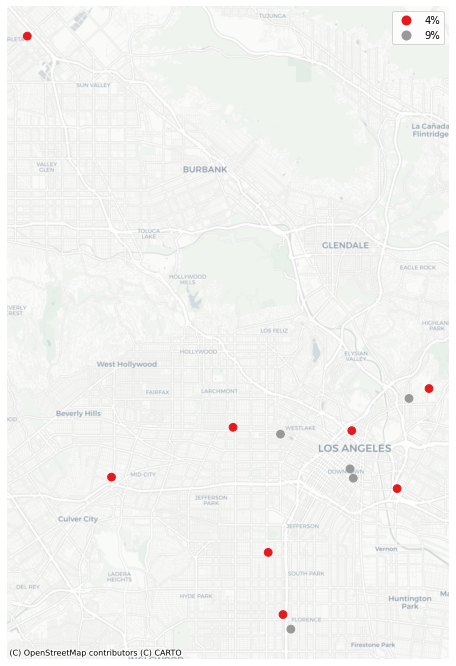

In [13]:
ax = la_projects_trimmed.plot(figsize=(12,12),
                              column='Type of tax credit funding',
                              legend=True,
                              cmap='Set1',
                             markersize=60)

ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)